 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [140]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [141]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_csv_data = pd.read_csv(whale_csv_path)
whale_csv_data.set_index(pd.to_datetime(whale_csv_data['Date'], infer_datetime_format=True), inplace=True)
whale_csv_data.drop(columns = ['Date'], inplace = True)
whale_csv_data.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2017-01-25,0.005272,0.009136,0.003471,0.006798
2018-05-23,-0.000899,-0.000659,0.005062,0.011108
2015-10-30,0.004128,-0.001505,-0.010816,0.006531
2016-11-07,0.020149,0.014847,0.021162,0.016361
2019-04-04,0.001255,0.010630,0.008459,-0.008037


In [142]:
# Count nulls
whale_csv_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [143]:
# Drop nulls
whale_csv_data = whale_csv_data.dropna().copy()
whale_csv_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [144]:
whale_csv_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [145]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")
algo_csv_data = pd.read_csv(algo_csv_path)
algo_csv_data.set_index(pd.to_datetime(algo_csv_data['Date'], infer_datetime_format=True), inplace=True)
algo_csv_data.drop(columns = ['Date'], inplace = True)
algo_csv_data.sample(5)

,Algo 1,Algo 2
Date,,
2016-06-20,0.005904,0.008472
2016-01-15,-0.020941,-0.020110
2018-08-08,0.008429,-0.001812
2017-02-07,0.001301,-0.001656
2017-07-10,-0.002043,-0.001211


In [146]:
# Count nulls
algo_csv_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [147]:
# Drop nulls
algo_csv_data = algo_csv_data.dropna().copy()
algo_csv_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [148]:
algo_csv_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [149]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("Resources/sp500_history.csv")
sp500_csv_data = pd.read_csv(sp500_csv_path)
sp500_csv_data.set_index(pd.to_datetime(sp500_csv_data['Date'], infer_datetime_format=True), inplace=True)
sp500_csv_data.drop(columns = ['Date'], inplace = True)
sp500_csv_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [150]:
# Check Data Types
sp500_csv_data.dtypes

Close    object
dtype: object

In [151]:
# Fix Data Types
#cleanse data by taking out the '$' symbol
sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")
sp500_csv_data["Close"]


/var/folders/g1/p_3g967x4c7dx51dnj06wb600000gn/T/ipykernel_12644/646602745.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [152]:

#then change 'Close' to a float
sp500_csv_data["Close"] = sp500_csv_data["Close"].astype("float")
sp500_csv_data.dtypes

Close    float64
dtype: object

In [153]:
# Calculate Daily Returns
# daily_returns = sp500_csv_data.pct_change()
# daily_returns.head()

daily_returns = (sp500_csv_data - sp500_csv_data.shift(1)) / sp500_csv_data.shift(1)
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [154]:
# Drop nulls
# sp500_csv_data = sp500_csv_data.dropna().copy()
# sp500_csv_data

daily_returns = daily_returns.dropna().copy()
daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [155]:
daily_returns.isnull().sum()

Close    0
dtype: int64

In [156]:
# Rename `Close` Column to be specific to this portfolio.
# sp500_csv_data.rename(columns = {"Close":"SP500 Close"}, inplace = True)
# sp500_csv_data

daily_returns.rename(columns = {"Close":"SP500 Close"}, inplace = True)
daily_returns

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [157]:
# Set the date as the index to the DataFrame
daily_returns.index

DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)

In [158]:
whale_csv_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [159]:
algo_csv_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [160]:
daily_returns.head()

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [161]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_rows = pd.concat([whale_csv_data, algo_csv_data, daily_returns], axis="columns", join="inner")
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

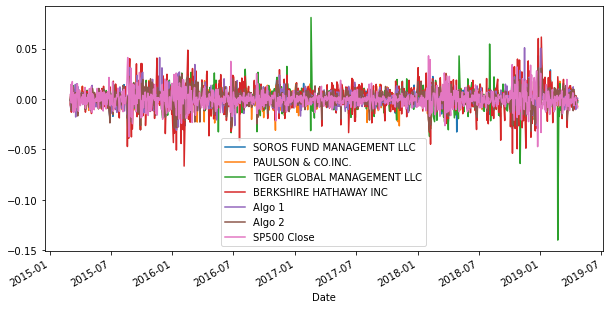

In [162]:
# Plot daily returns of all portfolios
joined_data_rows.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

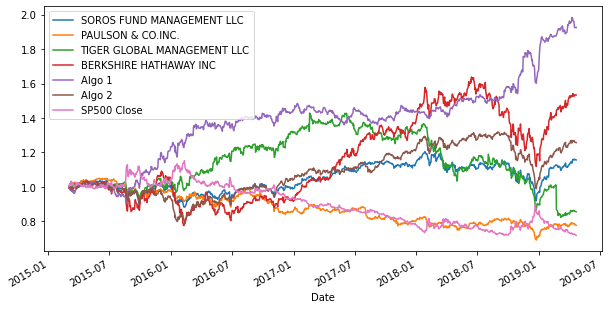

In [163]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_rows).cumprod()
#cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

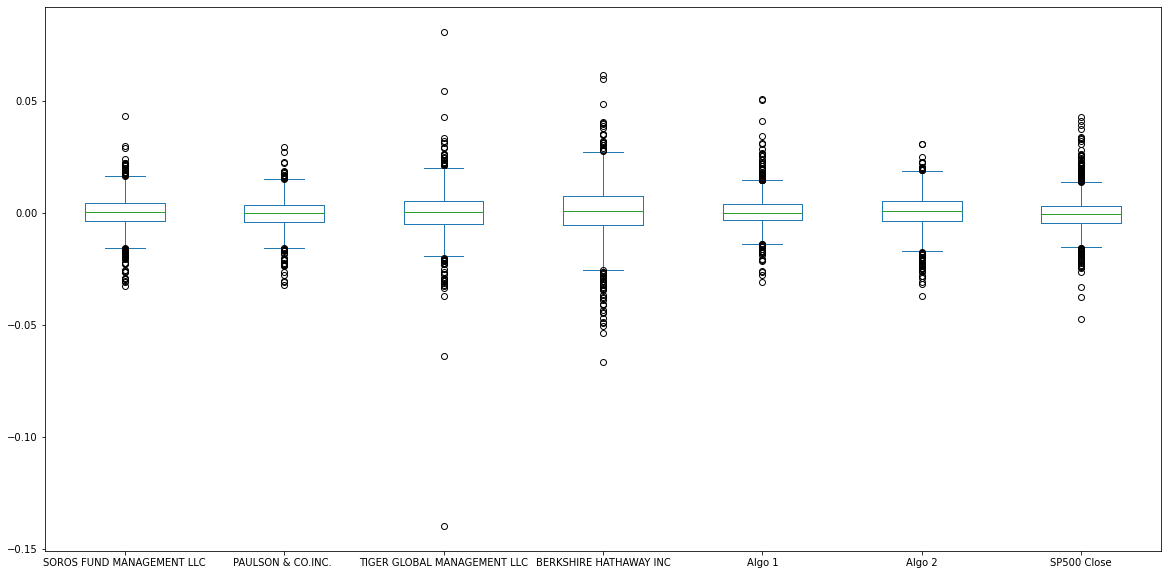

In [165]:
# Box plot to visually show risk
#
#joined_data_rows.plot.box(figsize=(20,10))
joined_data_rows.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [166]:
# Calculate the daily standard deviations of all portfolios
std_dev = joined_data_rows.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500 Close                    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_dev = daily_returns.std()
sp500_std_dev
# Determine which portfolios are riskier than the S&P 500
#compare the std dev vs the s&P

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_dev = joined_data_rows.std() * np.sqrt(252)
annual_std_dev

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_rolling_21 = whale_csv_data.rolling(window=21).std().plot()
whale_rolling_21

algo_rolling_21 = algo_csv_data.rolling(window=21).std().plot()
algo_rolling_21

sp500_rolling_21 = daily_returns.rolling(window=21).std().plot()
sp500_rolling_21

# Plot the rolling standard deviation
#plot on one chart

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = joined_data_rows.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=1, vmax=1)



### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

covariance = whale_csv_data.cov(daily_returns)
covariance
#rolling 
# Calculate variance of S&P 500
variance = daily_returns.var()
variance
# Computing beta
whale_beta = covariance / variance
whale_beta 
# Plot beta trend
whale_beta.plot(figsize={20,10)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratio

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
googl_csv_path = Path("Resources/goog_historical.csv")
googl_csv_path = pd.read_csv(googl_csv_path)
googl_csv_path.set_index(pd.to_datetime(googl_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
googl_csv_path.drop(columns = ['Trade DATE'], inplace = True)
googl_csv_path.head()
googl_df = googl_csv_path

In [ ]:
# Reading data from 2nd stock
cost_csv_path = Path("Resources/cost_historical.csv")
cost_csv_path = pd.read_csv(cost_csv_path)
cost_csv_path.set_index(pd.to_datetime(cost_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_csv_path.drop(columns = ['Trade DATE'], inplace = True)
cost_csv_path.head()
cost_df = cost_csv_path

In [ ]:
# Reading data from 3rd stock
aapl_csv_path = Path("Resources/aapl_historical.csv")
aapl_csv_path = pd.read_csv(aapl_csv_path)
aapl_csv_path.set_index(pd.to_datetime(aapl_csv_path['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_csv_path.drop(columns = ['Trade DATE'], inplace = True)
aapl_csv_path.head()
aapl_df = aapl_csv_path

In [ ]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([googl_df, cost_df, aapl_df], axis="rows", join="inner") 
combined_stocks

In [ ]:
# Reset Date index
comined_stocks = combined_stocks.reset_index()
combined_stocks = combined_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_stocks.head()

In [121]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['APPLE', 'COSTCO', 'GOOGLE']
combined_stocks.head()

,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [124]:
# Calculate daily returns

comb_daily_returns = combined_stocks.pct_change()
#comb_daily_returns.head()


# Drop NAs
comb_daily_returns = comb_daily_returns.dropna().copy()


# Display sample data
comb_daily_returns.sample(10)

,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2019-03-11,0.034642,0.008208,0.029274
2018-06-19,-0.016160,0.006401,-0.004602
2018-08-17,0.019970,0.011156,-0.004584
2019-02-01,0.000481,-0.020314,-0.005034
2018-06-28,0.007276,-0.006285,0.009276
2018-07-12,0.016766,0.014553,0.025635
2018-06-26,0.012406,-0.007839,-0.005645
2018-10-24,-0.034302,-0.021814,-0.048003
2018-08-21,-0.001949,0.005234,-0.005092


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [131]:
# Set weights
weights = [1/3, 1/3, 1/3]
aapl_weight = 0.33
cost_weight = 0.33
googl_weight = 0.33

# Calculate portfolio return

portfolio_return = aapl_weight * comb_daily_returns["APPLE"] + cost_weight * comb_daily_returns["COSTCO"] + googl_weight * comb_daily_returns["GOOGLE"]


# Display sample data
portfolio_return.sample(10)

Trade DATE
2019-04-01    0.010975
2018-05-21    0.007524
2018-05-18   -0.006000
2019-01-30    0.033031
2018-09-25    0.004685
2018-05-17   -0.001579
2019-03-13    0.006337
2018-12-17   -0.018866
2018-07-06    0.009999
2019-02-05    0.010160
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [133]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio_returns = pd.concat([joined_data_rows, combined_stocks], axis="columns", join="inner")
joined_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,APPLE,COSTCO,GOOGLE
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,188.59,195.76,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,188.15,195.88,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,186.44,195.48,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,188.18,198.71,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,186.99,199.60,1078.59
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,199.23,246.33,1221.10
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,199.25,245.34,1227.13
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,203.13,245.56,1236.34
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,203.86,245.81,1236.37


In [135]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio_returns = joined_portfolio_returns.dropna().copy()
joined_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,APPLE,COSTCO,GOOGLE
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,188.59,195.76,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,188.15,195.88,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,186.44,195.48,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,188.18,198.71,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,186.99,199.60,1078.59
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,199.23,246.33,1221.10
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,199.25,245.34,1227.13
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,203.13,245.56,1236.34
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,203.86,245.81,1236.37


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [136]:
# Calculate the annualized `std`
volatility = joined_portfolio_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.                 0.116683
Algo 1                            0.133645
Algo 2                            0.139204
SOROS FUND MANAGEMENT LLC         0.146589
SP500 Close                       0.152147
TIGER GLOBAL MANAGEMENT LLC       0.232434
BERKSHIRE HATHAWAY INC            0.246819
COSTCO                          219.950141
APPLE                           345.112320
GOOGLE                         1055.438182
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

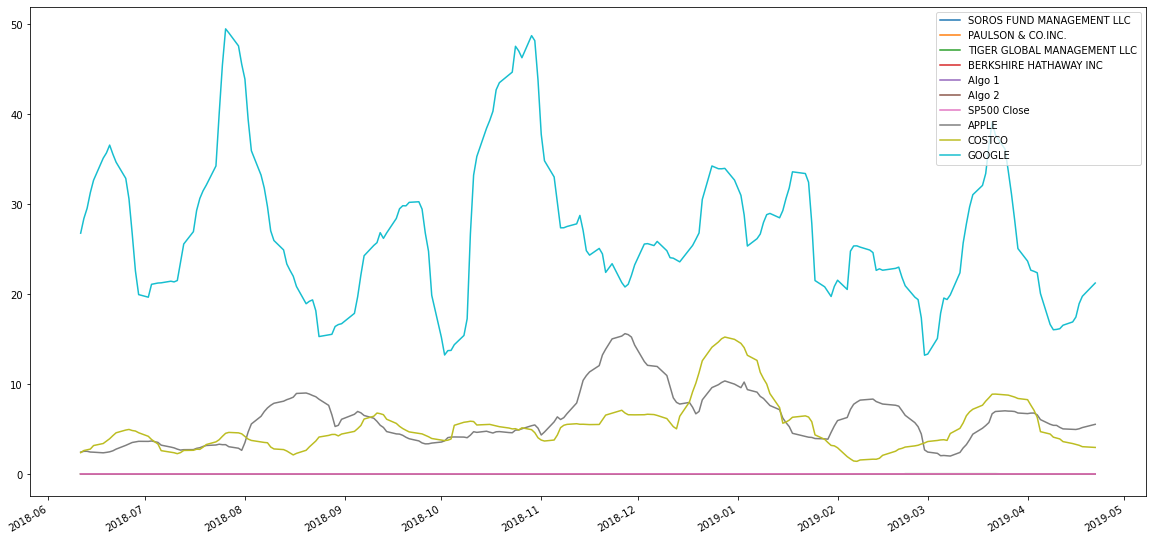

In [167]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
joined_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

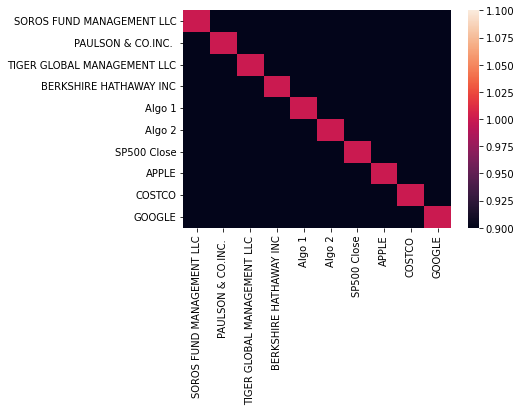

In [139]:
# Calculate and plot the correlation
correlation = joined_portfolio_returns.corr()

sns.heatmap(correlation, vmin=1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot 

#need help
#rolling_covariance = joined_portfolio_returns.rolling(window=60).cov(daily_returns['S&P 500'])

#rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()

#rolling_beta = rolling_covariance / rolling_variance
#rolling_beta.plot(figsize=(20,10), title="Rolling 60 Day Beta of Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!